# Задача №1

### Реализация двух схем: уголок и Лакса-Вендрофа с начальными и граничными условиями.
Начальное условие: $ u(x, 0) = sin(\frac{4 \pi x}{L}), 0 \leq x \leq L $ и переодические граничные условия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание начальных данных

In [2]:
T = 18
L = 20
h = 0.5
Ku = [0.6, 1., 1.01]
t = list()
for i in range(len(Ku)):
    t.append(Ku[i] * h)

In [3]:
def function_t0(x):
    return np.sin(4 * np.pi * x / L)

In [4]:
N = int(L / h) + 1
x = np.linspace(0, L, N)

### Реализуем схему уголок

In [5]:
def solve1(Ku, t):
    M = int(T / t) + 1

    u = np.zeros((M, N))

    u[0] = function_t0(x)

    for j in range(M - 1):
        for i in range(1, N):
            u[j + 1, i] = u[j, i] - t * (u[j, i] - u[j, i - 1]) / h
        u[j + 1, 0] = u[j + 1, N - 1]

    return u

### Реализуем схему Лакса - Вендорфа

In [6]:
def solve2(Ku, t):
    M = int(T / t) + 1

    u = np.zeros((M, N))

    u[0] = function_t0(x)

    for j in range(M - 1):
        for i in range(1, N - 1):
            u[j + 1, i] = u[j, i] - t * (u[j, i + 1] - u[j, i - 1]) / (2 * h) + \
                + t**2 / 2 * (u[j, i + 1] - 2 * u[j, i] + u[j, i - 1]) / h**2
        u[j + 1, N - 1] = u[j, N - 1] - t * (u[j, 0] - u[j, N - 2]) / 2 / h + \
            + t**2 / 2 * (u[j, 0] - 2 * u[j, N - 1] + u[j, N - 2]) / h**2
        u[j + 1, 0] = u[j + 1, N - 1]

    return u

### Вывод решений

In [17]:
def print_solve(method, text):
    u = method(Ku[0], t[0])
    
    print(u)

    fig, ax = plt.subplots()
    fig.suptitle(text)
    plt.subplots_adjust(bottom=0.3)
    ax.plot(x, u[0, :], '-o', x, function_t0(x), '-', lw=2)
    ax.margins(x=0)

    plt.show()

[[ 0.00000000e+00  3.09016994e-01  5.87785252e-01 ... -5.87785252e-01
  -3.09016994e-01 -4.89858720e-16]
 [-1.85410197e-01  1.23606798e-01  4.20524298e-01 ... -7.20524298e-01
  -4.76277949e-01 -1.85410197e-01]
 [-3.59930848e-01 -6.18033989e-02  2.42373798e-01 ... -8.24754144e-01
  -6.22825758e-01 -3.59930848e-01]
 ...
 [ 5.01279703e-01  4.69256055e-01  3.91298355e-01 ...  4.19789242e-01
   4.84234601e-01  5.01279703e-01]
 [ 4.91052642e-01  4.88470244e-01  4.38072975e-01 ...  3.56466890e-01
   4.45567386e-01  4.91052642e-01]
 [ 4.63761488e-01  4.90019683e-01  4.68311336e-01 ...  2.82070514e-01
   3.92107088e-01  4.63761488e-01]]


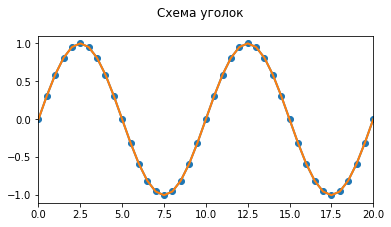

[[ 0.00000000e+00  3.09016994e-01  5.87785252e-01 ... -5.87785252e-01
  -3.09016994e-01 -4.89858720e-16]
 [-1.48328157e-01  1.27236646e-01  4.27428679e-01 ... -7.27428679e-01
  -4.79907798e-01 -1.48328157e-01]
 [-3.07486385e-01 -4.10575035e-02  2.52334223e-01 ... -8.41762431e-01
  -6.38507378e-01 -3.07486385e-01]
 ...
 [ 9.34893625e-01  8.19673208e-01  6.24347238e-01 ...  8.83510891e-01
   9.87713896e-01  9.34893625e-01]
 [ 9.60247355e-01  8.98418125e-01  7.48870813e-01 ...  7.89724546e-01
   9.44034886e-01  9.60247355e-01]
 [ 9.52465370e-01  9.46041833e-01  8.47384774e-01 ...  6.69255509e-01
   8.68020427e-01  9.52465370e-01]]


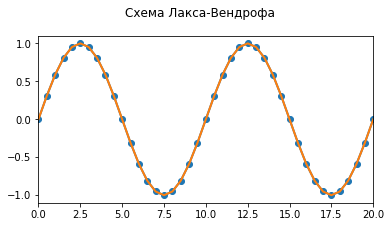

In [18]:
print_solve(solve1, 'Схема уголок')
print_solve(solve2, 'Схема Лакса-Вендрофа')